In [2]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.6.0


In [ ]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,6))
    size = 15
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1),history.history["accuracy"], label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Accuracy Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Accuracy Score", fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(range(1,epochs+1),history.history["loss"],label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Loss Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Loss Score", fontsize = size)

    plt.tight_layout()
    plt.show()

In [ ]:
test_data_dir = "/content/dog-cat-full-dataset/data/test"
train_data_dir = "/content/dog-cat-full-dataset/data/train"

In [ ]:
img_width = 32
img_height = 32
batch_size = 20

In [ ]:
# Burda Train, Test olarak ayrılmış ! Dikkat edeceğimiz Nokta

datagen = ImageDataGenerator(rescale= 1. / 255)

In [ ]:
train_generator = datagen.flow_from_directory(directory = train_data_dir, 
                                              target_size = (img_width, img_height),
                                              classes = ["dogs", "cats"],
                                              class_mode = "binary",
                                              batch_size = batch_size)

Found 20000 images belonging to 2 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(directory = test_data_dir,
                                                   target_size = (img_width, img_height),
                                                   classes = ["dogs", "cats"],
                                                   class_mode = "binary",
                                                   batch_size = batch_size)

Found 5000 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
len(train_generator), len(validation_generator)

(1000, 250)

In [ ]:
len(train_generator) * batch_size, len(validation_generator) * batch_size

(20000, 5000)

# Build CNN Base Model

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu",padding = "same", 
                 kernel_initializer= "he_uniform", input_shape = (img_width,img_height,3)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_initializer="he_uniform"))
model.add(Dense(1, activation = "sigmoid"))

opt = SGD(learning_rate = 0.01, momentum= 0.9)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,099,201
Trainable params: 2,099,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_history = model.fit_generator(generator = train_generator, steps_per_epoch= len(train_generator), epochs = 5, 
                                   validation_data = validation_generator, validation_steps = len(validation_generator))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 69s 69ms/step - loss: 0.6985 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5062
Epoch 2/5
1000/1000 [==============================] - 67s 67ms/step - loss: 0.6929 - accuracy: 0.5009 - val_loss: 0.6945 - val_accuracy: 0.4998
Epoch 3/5
1000/1000 [==============================] - 66s 66ms/step - loss: 0.6935 - accuracy: 0.5034 - val_loss: 0.6937 - val_accuracy: 0.5002
Epoch 4/5
1000/1000 [==============================] - 66s 66ms/step - loss: 0.6912 - accuracy: 0.5171 - val_loss: 0.7146 - val_accuracy: 0.5340
Epoch 5/5
1000/1000 [==============================] - 64s 64ms/step - loss: 0.6782 - accuracy: 0.5569 - val_loss: 0.6344 - val_accuracy: 0.6436


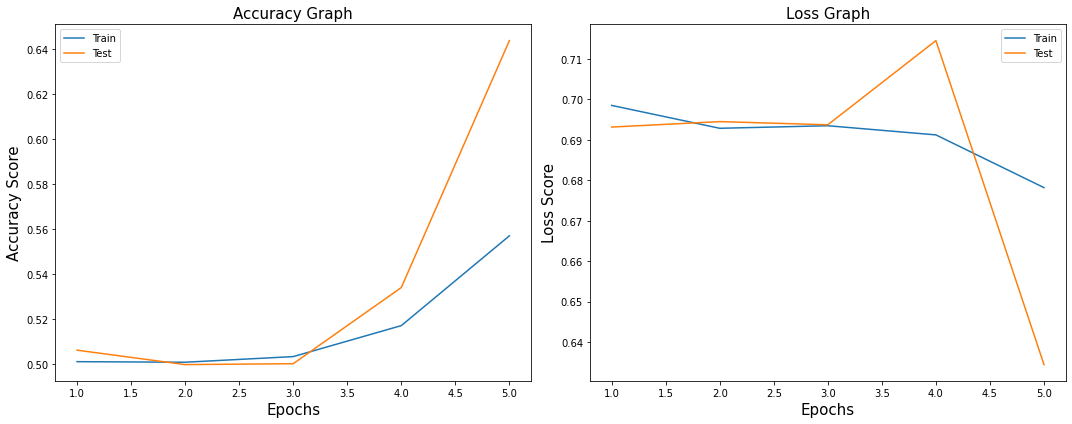

In [ ]:
history_graph(base_history, 5)

# Impliment First 3 Blocks of VGG16 Model

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",
                 activation = "relu", input_shape = (img_width, img_height, 3)))
model1.add(MaxPool2D(pool_size = (2,2)))

#model1 = Sequential()
model1.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",
                 activation = "relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

#model1 = Sequential()
model1.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",
                 activation = "relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Flatten())
model1.add(Dense(units = 128, activation = "relu", kernel_initializer = "he_uniform"))
model1.add(Dense(units = 1, activation = "sigmoid"))

opt = SGD(learning_rate = 0.01, momentum = 0.9)
model1.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)            

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",
                 activation = "relu", input_shape = (img_width, img_height, 3)))
model1.add(MaxPool2D(pool_size = (2,2)))

model1 = Sequential()
model1.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",activation = "relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

model1 = Sequential()
model1.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",activation = "relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Flatten())
model1.add(Dense(units = 128, activation = "relu", kernel_initializer = "he_uniform"))
model1.add(Dense(units = 1, activation = "sigmoid"))

opt = SGD(learning_rate = 0.01, momentum = 0.9)
model1.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
vgg_history = model1.fit_generator(generator = train_generator , steps_per_epoch= len(train_generator),
                                   epochs = 5, validation_data = validation_generator, validation_steps = len(validation_generator))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 73s 72ms/step - loss: 0.7394 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 70s 70ms/step - loss: 0.6936 - accuracy: 0.4938 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 73s 73ms/step - loss: 0.6934 - accuracy: 0.4999 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 73s 73ms/step - loss: 0.6935 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 70s 70ms/step - loss: 0.6936 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.5000


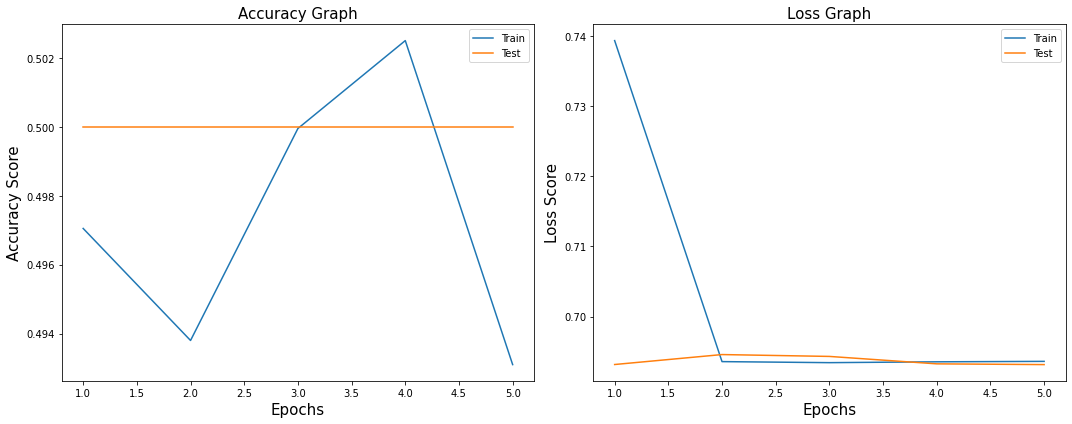

In [ ]:
history_graph(vgg_history,5)

# Batch Normalization And DropOut

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",
                 activation = "relu", input_shape = (img_width, img_height, 3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.2))

model2 = Sequential()
model2.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",
                 activation = "relu"))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.3))

model2 = Sequential()
model2.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", kernel_initializer = "he_uniform",
                 activation = "relu"))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(units = 128, activation = "relu", kernel_initializer = "he_uniform"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(units = 1, activation = "sigmoid"))

opt = SGD(learning_rate = 0.01, momentum = 0.9)
model2.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
bd_history = model2.fit_generator(generator = train_generator , steps_per_epoch= len(train_generator),
                                   epochs = 5, validation_data = validation_generator, validation_steps = len(validation_generator))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 160s 73ms/step - loss: 0.6828 - accuracy: 0.6306 - val_loss: 0.5875 - val_accuracy: 0.6922
Epoch 2/5
1000/1000 [==============================] - 73s 73ms/step - loss: 0.5872 - accuracy: 0.6934 - val_loss: 0.5521 - val_accuracy: 0.7272
Epoch 3/5
1000/1000 [==============================] - 72s 72ms/step - loss: 0.5513 - accuracy: 0.7224 - val_loss: 0.5787 - val_accuracy: 0.7088
Epoch 4/5
1000/1000 [==============================] - 72s 72ms/step - loss: 0.5254 - accuracy: 0.7424 - val_loss: 0.5793 - val_accuracy: 0.7106
Epoch 5/5
1000/1000 [==============================] - 70s 70ms/step - loss: 0.5036 - accuracy: 0.7575 - val_loss: 0.5216 - val_accuracy: 0.7510


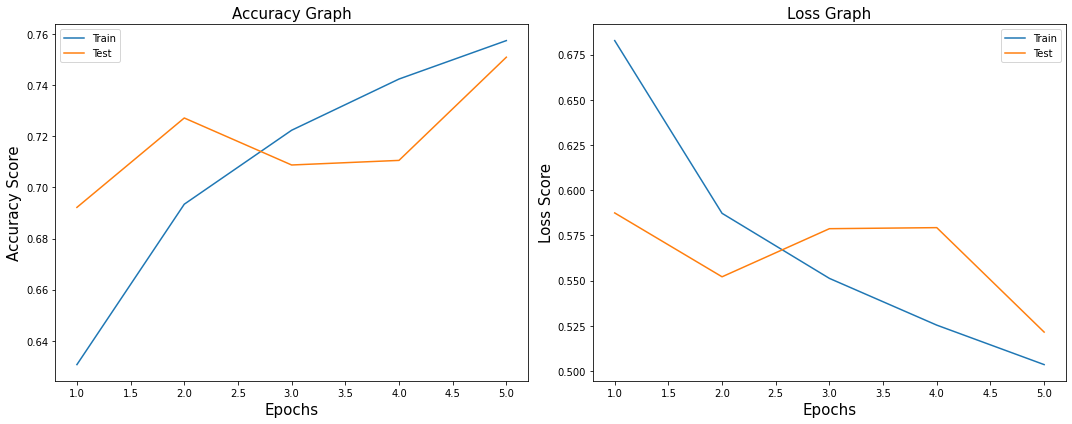

In [ ]:
history_graph(bd_history, 5)